In [3]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import IPython

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

In [4]:
import scipy.io.wavfile
(rate, data) = scipy.io.wavfile.read('russian_44100.wav')
#data = data[:44100]
# data = data[30000:200000,0]

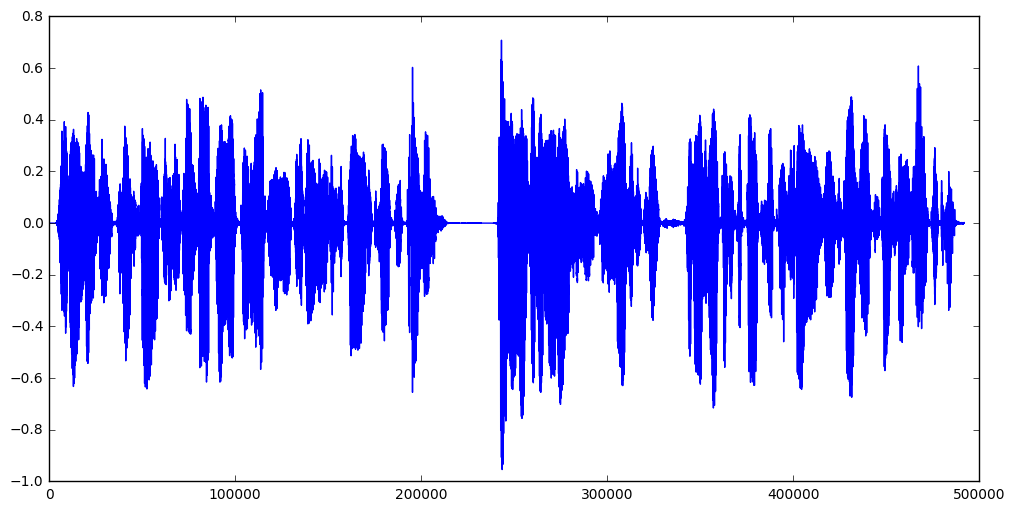

In [5]:
plt.plot(data)

In [6]:
IPython.display.Audio(data, rate=rate)

In [7]:
import stft

In [8]:
def plot_spectrogram(spec, window_size, hop_size, sample_rate, 
                     min_freq=0, max_freq=None, 
                     min_time=0, max_time=None,
                     colorbar=False):
    if max_freq == None:
        max_freq = sample_rate / 2
        
    if max_time == None:
        max_time = float(spec.shape[0] * hop_size) / sample_rate
        
    min_freq_index = int(min_freq * window_size / sample_rate)
    max_freq_index = int(max_freq * window_size / sample_rate)
    
    y_tick_count = 20
    plt.yticks(np.linspace(0, max_freq_index - min_freq_index, y_tick_count), 
               np.round(np.linspace(min_freq, max_freq, y_tick_count), 2))
    
    min_time_index = int(min_time * sample_rate) / hop_size
    max_time_index = int(max_time * sample_rate) / hop_size
    
    x_tick_count = 5
    plt.xticks(np.linspace(0, max_time_index - min_time_index, x_tick_count), 
               np.round(np.linspace(min_time, max_time, x_tick_count), 2))
    
    plt.imshow(np.sqrt(spec.T[min_freq_index:max_freq_index, min_time_index:max_time_index]), 
               origin='lower', aspect='auto', interpolation='nearest')
    
    if colorbar:
        plt.colorbar()

In [9]:
reload(stft)

window_size = 2048
hop_size = 512
sample_rate = rate

spec = stft.spectrogram(data, window_size, hop_size)

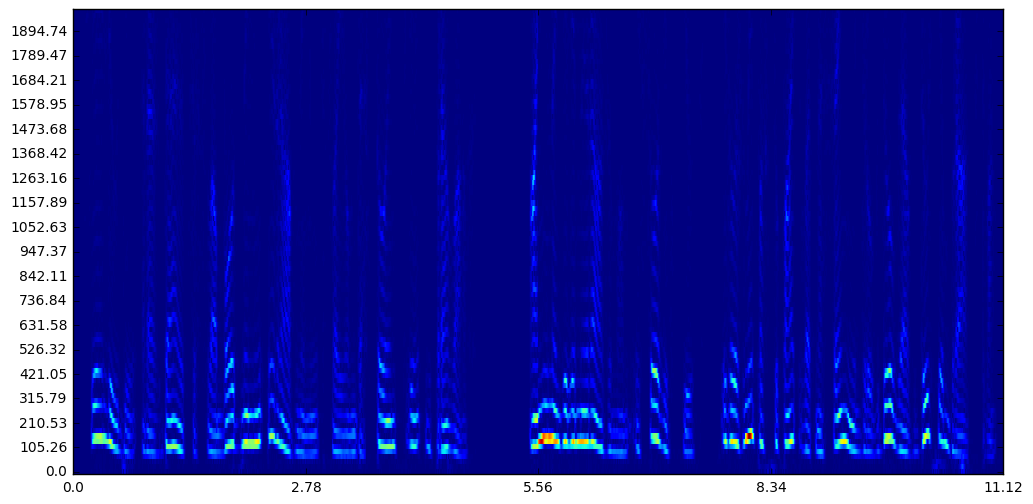

In [10]:
plot_spectrogram(spec, window_size, hop_size, sample_rate, 
                 max_freq=2000)

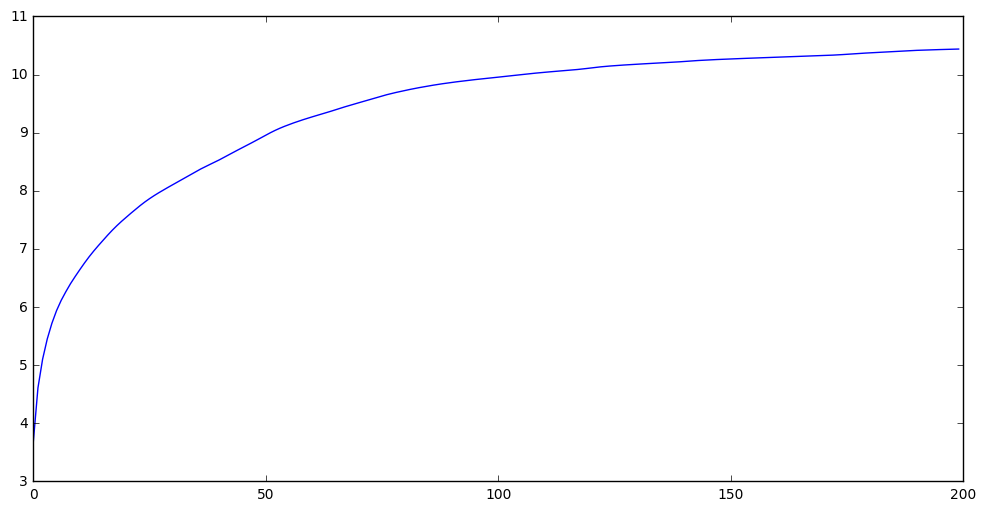

In [11]:
reload(stft)

from IPython import display
import time

ispec = np.zeros(0)
max_diffs = []
spec_1 = np.zeros(0)

orig_spec = np.sqrt(spec)

def ispec_callback(res):
    global ispec, spec_1
    global max_diffs
    
    ispec = res
    spec_1 = np.sqrt(stft.spectrogram(res, window_size, hop_size))
    
    max_diffs += [-10 * np.log10(np.linalg.norm(spec_1 - orig_spec) / np.linalg.norm(orig_spec))]
            
    plt.cla()
    plt.plot(max_diffs)
    
    display.display(plt.gcf())
    time.sleep(0.01)
    display.clear_output(wait=True)

stft.ispectrogram(spec, window_size, hop_size, iters=200, callback=ispec_callback);

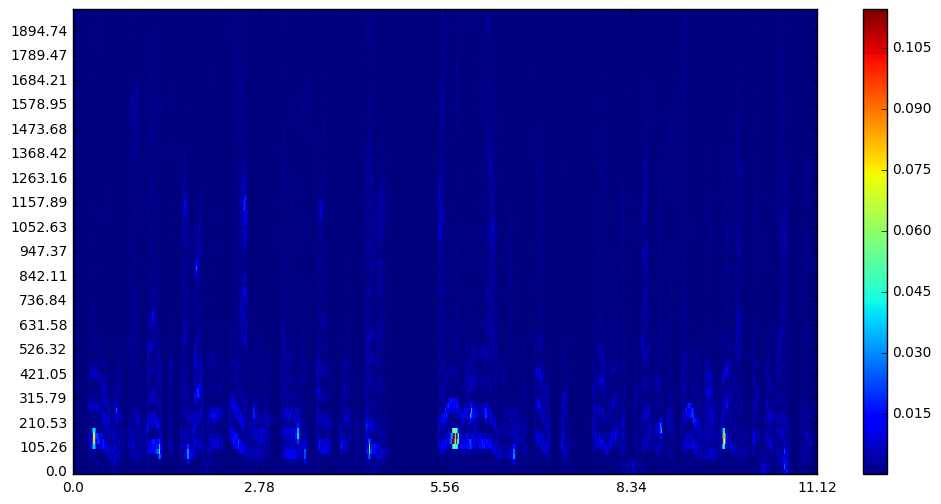

In [13]:
plot_spectrogram(np.abs(orig_spec ** 2 - spec_1 ** 2), window_size, hop_size, sample_rate,
                 max_freq=2000, colorbar=True)

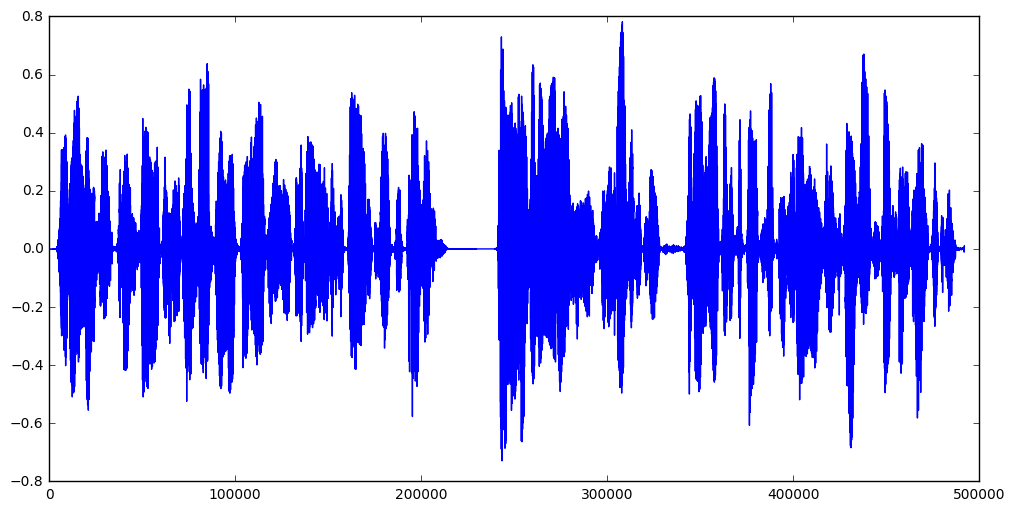

In [14]:
plt.plot(ispec)
IPython.display.Audio(ispec, rate=rate)

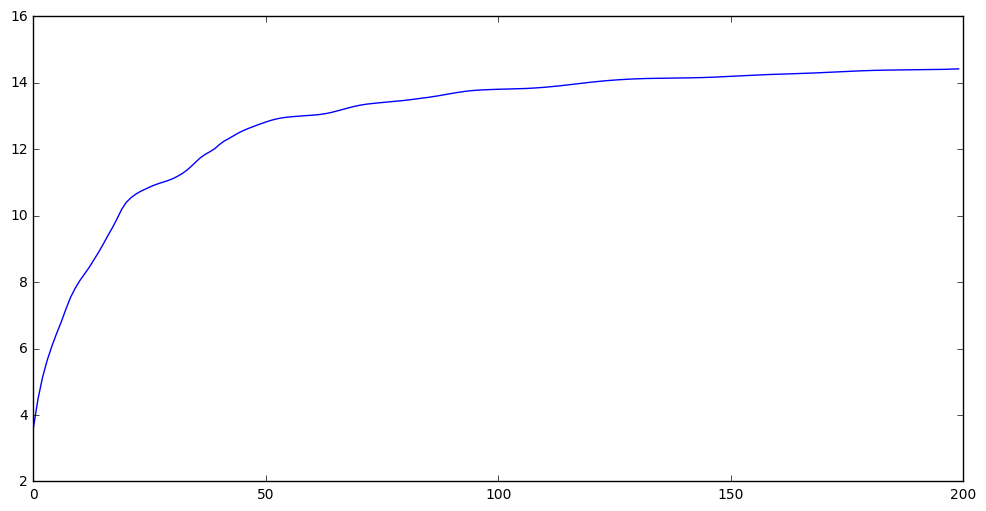

In [15]:
reload(stft)

from IPython import display
import time

max_diffs_fast = []
spec_1_fast = np.zeros(0)

orig_spec = np.sqrt(spec)

def ispec_callback(spec_):
    global spec_1_fast
    global max_diffs_fast
    
    spec_1_fast = np.abs(spec_)
    
    max_diffs_fast += [-10 * np.log10(np.linalg.norm(spec_1_fast - orig_spec) / np.linalg.norm(orig_spec))]
            
    plt.cla()
    plt.plot(max_diffs_fast)
    
    display.display(plt.gcf())
    time.sleep(0.01)
    display.clear_output(wait=True)

ispec_fast = stft.ispectrogram_fast(spec, window_size, hop_size, alpha=0.99, iters=200, callback=ispec_callback);

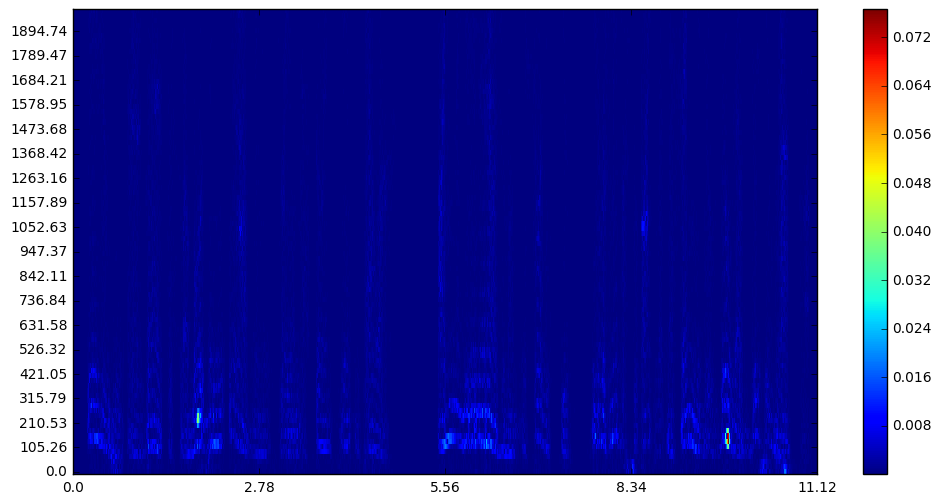

In [16]:
plot_spectrogram(np.abs(orig_spec ** 2 - spec_1_fast ** 2), window_size, hop_size, sample_rate,
                 max_freq=2000, colorbar=True)

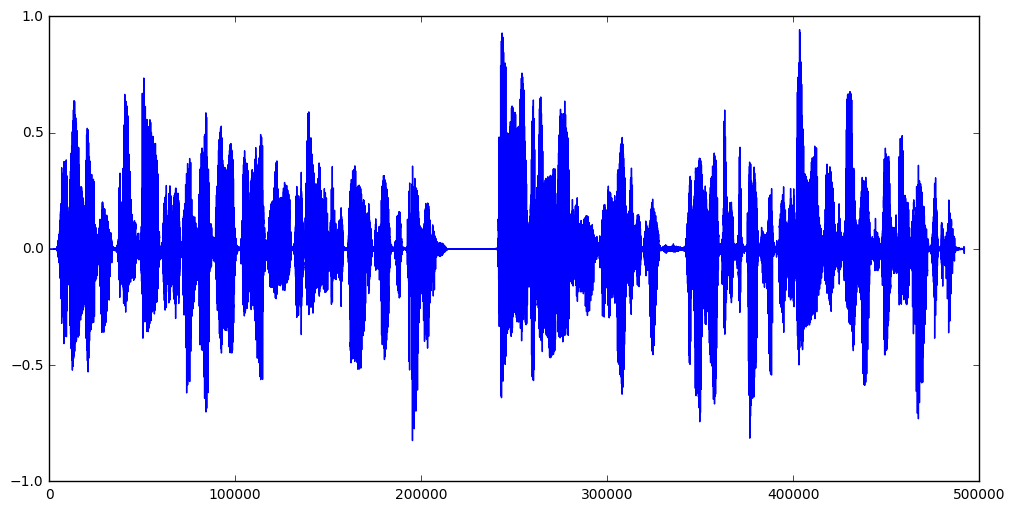

In [17]:
plt.plot(ispec_fast)
IPython.display.Audio(ispec_fast[:len(data)], rate=rate)